In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Recibe imagen como parametro e indica el color predominante en este

In [24]:
import cv2

def classify_and_display_color(image_path):
    # Cargar la imagen
    frame = cv2.imread(image_path)
    
    if frame is None:
        print(f"No se pudo cargar la imagen en '{image_path}'. Asegúrate de que la ruta sea correcta.")
        return

    # Convertir la imagen a espacio de color HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Obtener las dimensiones de la imagen
    height, width, _ = frame.shape

    # Coordenadas del centro de la imagen
    cx = int(width / 2)
    cy = int(height / 2)

    # Obtener el valor de tono (hue) del píxel central
    pixel_center = hsv_frame[cy, cx]
    hue_value = pixel_center[0]

    # Clasificar el color
    color = "Undefined"
    if 0 <= hue_value < 5 or 170 <= hue_value <= 180:
        color = "RED"
    elif 5 <= hue_value < 22:
        color = "ORANGE"
    elif 22 <= hue_value < 33:
        color = "YELLOW"
    elif 33 <= hue_value < 78:
        color = "GREEN"
    elif 78 <= hue_value < 167:
        color = "BLUE"


    # Mostrar el resultado sobre la imagen
    cv2.putText(frame, f"Color Predominante: {color}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Mostrar la imagen
    cv2.imshow("Imagen con Color Predominante", frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Ruta de la imagen que quieres procesar
image_path = "C:/Users/carlo/OneDrive/Escritorio/U/PDI/PDI/proyecto/palletsAndina-main/palletsAndina-main/ColorModule/neww/random.png"

# Llamada a la función con la imagen como parámetro
classify_and_display_color(image_path)


## Recibe archivo y entrega el color del pallet y tipo de este (si es o no andina)

In [2]:
import cv2

def classify_and_display_color(image_path):
    # Cargar la imagen
    frame = cv2.imread(image_path)
    
    if frame is None:
        print(f"No se pudo cargar la imagen en '{image_path}'. Asegúrate de que la ruta sea correcta.")
        return

    # Convertir la imagen a espacio de color HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Obtener las dimensiones de la imagen
    height, width, _ = frame.shape

    # Coordenadas del centro de la imagen
    cx = int(width / 2)
    cy = int(height / 2)

    # Obtener el valor de tono (hue) del píxel central
    pixel_center = hsv_frame[cy, cx]
    hue_value = pixel_center[0]

    # Clasificar el color
    color = "Undefined"
    if 0 <= hue_value < 5 or 170 <= hue_value <= 180:
        color = "RED"
    elif 22 <= hue_value < 33:
        color = "YELLOW"
    elif 33 <= hue_value < 78:
        color = "GREEN"
    elif 78 <= hue_value < 167:
        color = "BLUE"
    


    # Calcular posición de la etiqueta para que se adapte al tamaño de la imagen
    text_size = cv2.getTextSize(f"C. Dominancia: {color}", cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
    text_x = int((width - text_size[0]) / 2)
    text_y = height - 10

    # Añadir etiqueta debajo de la imagen
    cv2.putText(frame, f"Dominancia: {color}", (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    # Mostrar la imagen
    
    cv2.imshow("color", frame)
    cv2.waitKey(0) 
    if color=="BLUE" or color=="RED" or color=="YELLOW" or color=="GREEN":
        print("No andina")
    cv2.destroyAllWindows()

# Ruta de la imagen que quieres procesar
image_path = "C:/Users/carlo/OneDrive/Escritorio/U/PDI/PDI/proyecto/palletsAndina-main/palletsAndina-main/ColorModule/neww/palletred.png"

# Llamada a la función con la imagen como parámetro
classify_and_display_color(image_path)


No andina


image_path = "C:/Users/carlo/OneDrive/Escritorio/U/PDI/PDI/proyecto/palletsAndina-main/palletsAndina-main/ColorModule/neww/random.png"


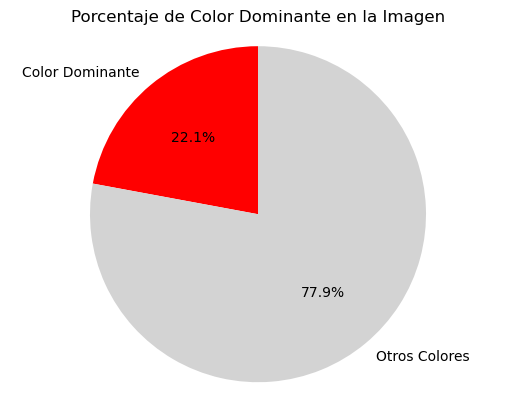

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def obtener_color_dominante(imagen):
    # Leer la imagen con OpenCV
    img = cv2.imread(imagen)

    # Convertir la imagen de BGR a RGB (OpenCV utiliza BGR por defecto)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Aplanar la imagen para trabajar más fácilmente con numpy
    pixels = img_rgb.reshape((-1, 3))

    # Calcular la frecuencia de cada color
    color_frecuencia = np.unique(pixels, axis=0, return_counts=True)[1]

    # Calcular el color dominante (el color con mayor frecuencia)
    color_dominante = color_frecuencia.argmax()

    # Calcular el porcentaje de color dominante en la imagen
    porcentaje_dominante = (color_dominante / pixels.shape[0]) * 100

    return porcentaje_dominante

def mostrar_grafico_pie(porcentaje_dominante):
    # Crear un gráfico circular con el porcentaje de color dominante
    labels = ['Color Dominante', 'Otros Colores']
    sizes = [porcentaje_dominante, 100 - porcentaje_dominante]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'lightgrey'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('Porcentaje de Color Dominante en la Imagen')
    plt.show()

if __name__ == "__main__":
    image_path = "C:/Users/carlo/OneDrive/Escritorio/U/PDI/PDI/proyecto/palletsAndina-main/palletsAndina-main/ColorModule/neww/random.png"
    porcentaje_dominante = obtener_color_dominante(image_path)
    mostrar_grafico_pie(porcentaje_dominante)


In [ ]:
###Modulo de implementacion con camara en tiempo real, util para trabajos a fututo
import cv2

cap = cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 720)


while True:
    _, frame = cap.read()
    hsv_frame=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    height, width, _=frame.shape
    
    cx= int(width/2)
    cy= int(height/2)

    #VALOR DEL PIXEL Pick Pixel Value 
    pixel_center= hsv_frame[cy, cx]
    hue_value = pixel_center[0]
    
    color = "Undefined"
    if hue_value <5:
        color = "RED"
    elif hue_value<22: 
        color="ORANGE"
    elif hue_value<33: 
        color="YELLOW"
    elif hue_value<78: 
        color="GREEN"
    elif hue_value<167:
        color ="BLUE"
    elif hue_value<170:
        color ="VIOLET"
    else: 
        color="BLACK"
    
    pixel_center_bgr= frame[cy,cx]
    print(pixel_center)
    cv2.putText(frame, color, (10,50),0,1,(255,0,0),2)
    cv2.circle(frame, (cx,cy),5,(255,0,0),3)
    
    
    frame_rot = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

    
    cv2.imshow("Frame", frame_rot)
    key= cv2.waitKey(1)
    if key == 27:
        break
        
        
cap.release()
cv2.destroyAllWindows()